# Understanding Network Data

**Objective:** Today we will discuss the different types of protocols we observe at each layer within a packet. We will understand how to process and work with this data programatically.

## 5-Layer Network Model
<img src='./images/network_layers.png'>Network Model</img>

## The Hourglass ("Thin-Waist") Model in IP Networking

The **"thin-waist"** or **"hourglass" model** is a powerful analogy used to conceptualize the architecture of the Internet Protocol (IP) networking stack. This model highlights how a broad range of applications and technologies converge on a narrow, unified middle layer (the "waist" of the hourglass) to ensure interoperability and scalability.


<img src='./images/hourglass_model.png'>Network Model</img>

### Structure of the Hourglass Model
- **Applications (Top-most Layer):**
    - Represents the Application Layer where there's a vast variety of applications such as web browsers, email clients, messaging apps, and more.
    - Each application might use the Internet differently, but all depend on the layers below.
- **Transport (Top Layer):**
    - Just above the "thin waist" of the Internet Layer, lies the Transport Layer. This layer is integral to enabling end-to-end communication and carries responsibilities like:
        - Segmentation and Reassembly: Breaking down large messages and reassembling them at the destination.
        - Error Control: Ensuring reliable data transmission (e.g., TCP retransmits lost packets).
        - Flow Control: Managing data transmission rates suitable for the receiver.
        - Connection Management: Handling the setup, maintenance, and termination of connections in protocols like TCP.
        - Port Numbers: Allowing multiple services on a device to simultaneously use the network.
    - The Transport Layer ensures this data reaches the right destination in the desired form.
- **IP (Middle Layer):**
    - This is the crux of the hourglass: the Internet Layer, specifically IP (Internet Protocol).
    - It acts as a universal glue that binds all parts of the Internet together, irrespective of the application above or the technology below.
    - The benefits of this design include:
        - Interoperability: Ensuring communication across devices and networks from different vendors and technologies.
        - Flexibility: Facilitating the introduction of new technologies without disrupting the IP layer.
        - Innovation: Allowing the creation of new applications or network tech without redesigning the Internet's core.
- **Link (Bottom Layer):**
    - Represents technologies that transmit IP packets: Ethernet, Wi-Fi, cellular networks, satellite links, fiber optics, and more.
    - These technologies may vary in operation but all serve to transport IP packets from one device to another.

This unified overview of the hourglass model along with the Transport Layer's role provides a comprehensive insight into the Internet protocol stack's modular design.

# Reading Network Data 

In [27]:
import dpkt       # Packet manipulation
from scapy.all import *        # Another packet manipulation library
import pandas as pd            # Pandas - Create and Manipulate DataFrames
import numpy as np             # Math Stuff (don't worry only used for one line :] )
import binascii                # Binary to Ascii 
import seaborn as sns          # Graphing Library
import matplotlib.pyplot as plt
sns.set(color_codes=True)

## Reading in a PCAP
We can read in packet capture programatically using the `scapy` library. The `rdpcap` function will return an object of type `scapy.plist.PacketList` which represents a list of packet objects that we can iterate over. We can receive a summary of the transport protocols used in this pcap.

In [4]:
pcap = rdpcap('data/speedtest.pcap')

In [5]:
type(pcap)

scapy.plist.PacketList

In [4]:
print(pcap)

<speedtest.pcap: TCP:29028 UDP:7896 ICMP:0 Other:5>


In [5]:
sample_pkt = pcap[2446]
sample_pkt.show()

###[ Ethernet ]###
  dst       = 00:00:5e:00:01:e1
  src       = 5c:e9:1e:b3:8e:0e
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 576
     id        = 0
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = tcp
     chksum    = 0xf25
     src       = 10.194.128.144
     dst       = 3.229.154.92
     \options   \
###[ TCP ]###
        sport     = 53051
        dport     = https
        seq       = 2602046834
        ack       = 54329897
        dataofs   = 8
        reserved  = 0
        flags     = A
        window    = 2055
        chksum    = 0x183
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (3279180802, 1418452974))]
###[ Raw ]###
           load      = b'\x16\x03\x01\x02v\x01\x00\x02r\x03\x03\x06\x8a<C=a\xf7\x1b4\xaeR\x86\x9eE\x84\xfdEh\xf2\xeb\xf9*p|\xdbB\xb9\x12h560 Bb\xf5\x1b\x0b\xd7\xd6J\xd8\x18\x01\x1a7\xc2\xdaD\x7f)\x98\xf5\x89=\xe2\xfc\x8b\x0f\xf4*\xc

## Ethernet Layer

### MAC Address
A **MAC (Media Access Control)** address is a unique identifier assigned to network interfaces for communications on the physical network segment. It's essentially the "physical address" of a device on a local network, and it plays a pivotal role in the data link layer of the OSI model to help route packets of data on a local area network (LAN).

#### Key Points:
**Uniqueness:** Every network interface card (NIC) manufactured is typically given a unique MAC address, ensuring that every device on a local network can be uniquely identified by its MAC address.

**Physical Addressing:** While IP addresses operate at the network layer to route packets over wide networks, MAC addresses function at the data link layer to deliver packets within local networks.

**Immutable:** In theory, a MAC address is permanent, burned into the hardware. However, many modern NICs and software interfaces allow for MAC address modification, known as MAC spoofing.

**Format:**
A MAC address is 48 bits long and is usually represented as six groups of two hexadecimal digits, separated by colons (:) or hyphens (-).

```
 0                   1                   2                   3  
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                                                               |
|                     Destination MAC Address                    |
|                                                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                                                               |
|                       Source MAC Address                       |
|                                                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           EtherType          |                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+                               +
|                                                               |
|                           Payload                             |
|                                                               |
|                                                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|   Frame Check Sequence (FCS)   |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

```
**Destination MAC Address (6 bytes):** This is the MAC address of the destination network interface card (NIC). The data will be read by the device that matches this address.

**Source MAC Address (6 bytes):** The MAC address of the NIC that sent the frame.  

**EtherType (2 bytes):** This field indicates which protocol is encapsulated in the payload of the frame. For instance, an EtherType value of 0x0800 indicates that the payload is an IPv4 packet.  

**Payload (46-1500 bytes):** This contains the encapsulated protocol data, like an IP packet or ARP message. The minimum length is 46 bytes, and the maximum is 1500 bytes. If a smaller message needs to be sent, padding is used to reach the 46-byte minimum.  

**Frame Check Sequence (FCS) (4 bytes):** This is a checksum value used to detect errors in the transmitted frame. It's generated by the source NIC and verified by the destination NIC.  

This diagram provides a simplified view. Ethernet standards and variations (like VLAN-tagged frames) can introduce additional fields or variations, but the Ethernet II frame format is foundational and widely recognized.

In [6]:
# Ethernet Layer is the first layer we read
ethernet_frame = sample_pkt

In [7]:
type(ethernet_frame)

scapy.layers.l2.Ether

In [8]:
# Timestamp saved for packet on capture device
# Epoch time
print(ethernet_frame.time)

1704286203.174895


In [9]:
from datetime import datetime
epoch_time = float(ethernet_frame.time)
readable_time = datetime.fromtimestamp(epoch_time).strftime('%Y-%m-%d %H:%M:%S')

print(f"Actual timestamp: {readable_time}")

Actual timestamp: 2024-01-03 18:20:03


In [10]:
print(ethernet_frame.src + " ==> " + ethernet_frame.dst) 

5c:e9:1e:b3:8e:0e ==> 00:00:5e:00:01:e1


## IP Layer

```
 0                   1                   2                   3   
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|Version|  IHL  |Type of Service|          Total Length         |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|         Identification        |Flags|      Fragment Offset    |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|  Time to Live |    Protocol   |         Header Checksum       |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                       Source Address                          |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Destination Address                        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Options                    |    Padding    |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
```
**Version (4 bits):** Specifies the version of the IP protocol. For IPv4, this is always set to 4.

**IHL (Internet Header Length, 4 bits):** Indicates the header length in 32-bit words. The minimum value for this field is 5, which represents a header length of 20 bytes.

**Type of Service (8 bits):** Specifies how the datagram should be handled, such as its priority.

**Total Length (16 bits):** Indicates the entire packet size, including header and data, in bytes.

**Identification (16 bits):** Helps in assembling the fragments of a datagram.

**Flags (3 bits):** Control or identify fragments. There are three flags: Reserved (always zero), Don't Fragment (DF), and More Fragments (MF).

**Fragment Offset (13 bits):** Indicates where in the datagram this fragment belongs.

**Time to Live (TTL, 8 bits):** Specifies the time limit in seconds or hops for the datagram before it's discarded.

**Protocol (8 bits):** Defines the protocol used in the data portion of the IP datagram.

**Header Checksum (16 bits):** Used for error-checking the header.

**Source Address (32 bits):** The IPv4 address of the source node.

**Destination Address (32 bits):** The IPv4 address of the destination node.

**Options (variable):** Allows for various options, such as security. Its presence is determined by the IHL field.

**Padding (variable):** Ensures the header is a multiple of 32 bits in length. The length of the padding is determined by the IHL field.

In [11]:
# IP Layer is the next layer we read
ethernet_frame = sample_pkt
ip_pkt = ethernet_frame.payload

In [12]:
# Length of the IP payload
print(ip_pkt.len)

576


In [13]:
# Incoming packet
print(ip_pkt.src + " ==> " + ip_pkt.dst) 

10.194.128.144 ==> 3.229.154.92


Local Subnets **(PRIVATE ADDRESSES)**
1. **10.0.0.0/8**       (10.0.0.0 - 10.255.255.255)   
2. **172.16.0.0/12**    (172.16.0.0 - 172.31.255.255)   
3. **192.168.0.0/16**   (192.168.0.0 - 192.168.255.255)

In [14]:
! whois 3.229.154.92


'whois' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
! pip install python-whois

Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1

[notice] To update, run: python.exe -m pip install --upgrade pip

In [16]:
import whois

domain_info = whois.whois("3.229.154.92")
print(domain_info)

{
  "domain_name": "AMAZONAWS.COM",
  "registrar": "MarkMonitor, Inc.",
  "registrar_url": "http://www.markmonitor.com",
  "reseller": null,
  "whois_server": "whois.markmonitor.com",
  "referral_url": null,
  "updated_date": [
    "2024-01-29 18:09:26",
    "2024-08-02 02:17:33+00:00"
  ],
  "creation_date": [
    "2005-08-18 02:10:45",
    "2005-08-18 02:10:45+00:00"
  ],
  "expiration_date": [
    "2027-01-16 04:59:59",
    "2027-01-16 00:00:00+00:00"
  ],
  "name_servers": [
    "NS-1321.AWSDNS-37.ORG",
    "NS-1670.AWSDNS-16.CO.UK",
    "NS-27.AWSDNS-03.COM",
    "NS-967.AWSDNS-56.NET"
  ],
  "status": [
    "clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited",
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited",
    "serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited",
    "serverTransferProhibited https://icann.org/epp#serverTransferProhibited",


## Transport Layer

### TCP

```
0                   1                   2                   3
0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|          Source Port          |       Destination Port        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                        Sequence Number                        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Acknowledgment Number                      |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|  Data |           |U|A|P|R|S|F|                               |
| Offset| Reserved  |R|C|S|S|Y|I|            Window             |
|       |           |G|K|H|T|N|N|                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           Checksum            |         Urgent Pointer        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Options                    |    Padding    |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                             data                              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
02 04 05 a0 01 03 03 05 01 01 08 0a 1d 74 65 c5 00 00 00 00 04 02 00 00
```
**Source Port (16 bits):** Specifies the source port number.

**Destination Port (16 bits):** Specifies the destination port number.

**Sequence Number (32 bits):** If the SYN flag is set, this is the initial sequence number. Otherwise, it's the accumulated sequence number of the first data byte in this segment (with the first byte during the connection setup counting as 1).

**Acknowledgment Number (32 bits):** If the ACK flag is set, this field contains the value of the next sequence number the sender of the segment is expecting to receive.

**Data Offset (4 bits):** Specifies the size of the TCP header in 32-bit words. Also known as the header length field.

**Reserved (3 bits):** Reserved for future use and should be set to zero.

**Flags (9 bits):**

- URG (1 bit): Urgent pointer field significant.
- ACK (1 bit): Acknowledgment field significant.
- PSH (1 bit): Push Function.
- RST (1 bit): Reset the connection.
- SYN (1 bit): Synchronize sequence numbers.
- FIN (1 bit): No more data from the sender.

**Window (16 bits):** Specifies the size of the sender's receive window (or buffer space) that is available.

**Checksum (16 bits):** Used for error-checking of the header and data. It checks whether the data has been transmitted accurately.

**Urgent Pointer (16 bits):** If the URG flag is set, then this 16-bit field is an offset from the sequence number indicating the last urgent data byte.

**Options (variable):** The length of this field is determined by the data offset field. This field could be zero or more 32-bit words.

**Padding (variable):** Ensures the header is a multiple of 32 bits in length. The length of the padding is determined by the data offset field.

**Data (variable):** The actual data transmitted by the TCP segment. The length of this field can be determined by the total length minus the data offset value.

This header format provides an overview of how TCP segments are structured. Remember, TCP is a connection-oriented protocol, ensuring reliable, ordered, and error-checked delivery of a stream of octets between applications running on hosts in an IP network.

In [17]:
transport_segment = ip_pkt.payload
type(transport_segment)

scapy.layers.inet.TCP

In [18]:
transport_segment.show()

###[ TCP ]###
  sport     = 53051
  dport     = https
  seq       = 2602046834
  ack       = 54329897
  dataofs   = 8
  reserved  = 0
  flags     = A
  window    = 2055
  chksum    = 0x183
  urgptr    = 0
  options   = [('NOP', None), ('NOP', None), ('Timestamp', (3279180802, 1418452974))]
###[ Raw ]###
     load      = b'\x16\x03\x01\x02v\x01\x00\x02r\x03\x03\x06\x8a<C=a\xf7\x1b4\xaeR\x86\x9eE\x84\xfdEh\xf2\xeb\xf9*p|\xdbB\xb9\x12h560 Bb\xf5\x1b\x0b\xd7\xd6J\xd8\x18\x01\x1a7\xc2\xdaD\x7f)\x98\xf5\x89=\xe2\xfc\x8b\x0f\xf4*\xce\xca\xc1\xcb\x00 \x9a\x9a\x13\x01\x13\x02\x13\x03\xc0+\xc0/\xc0,\xc00\xcc\xa9\xcc\xa8\xc0\x13\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x02\t\x8a\x8a\x00\x00Di\x00\x05\x00\x03\x02h2\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00\x17\x00\x00\x00\r\x00\x12\x00\x10\x04\x03\x08\x04\x04\x01\x05\x03\x08\x05\x05\x01\x08\x06\x06\x01\x00\x00\x00\x0f\x00\r\x00\x00\npiazza.com\x00+\x00\x07\x06\x8a\x8a\x03\x04\x03\x03\x00\n\x00\n\x00\x08**\x00\x1d\x00\x17\x00\x18\x003\x00+\x00)**\x0

### UDP

```
 0                   1                   2                   3   
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|     Source Port (16 bits)     |  Destination Port (16 bits)   |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           Length (16 bits)    |       Checksum (16 bits)      |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                              data                             |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

```
**Source Port (16 bits):** Specifies the port number on the source machine. This is often assigned dynamically by the source machine for outgoing packets (ephemeral port). For well-known services, this field often contains the service's assigned port number.   

**Destination Port (16 bits):** Specifies the port number on the destination machine. For well-known services, this field contains the service's assigned port number.   

**Length (16 bits):** Specifies the length in bytes of the entire datagram: header and data. The minimum value for this field is 8, which corresponds to the length of the header.   

**Checksum (16 bits):** Used for error-checking the header and data. The checksum field provides a means of detecting errors introduced during transmission or reception. The algorithm to compute the checksum is defined in the RFC for UDP.   

**Data (variable):** The actual data transmitted by the UDP datagram. Its size can be determined by subtracting the length of the header (8 bytes) from the value in the Length field.   

UDP is a connectionless protocol that doesn't guarantee delivery, order, or data integrity, but it's faster and requires fewer resources compared to TCP. It's often used for real-time services like video or voice streaming, where occasional lost packets are acceptable and can be managed at higher layers or by the application itself.



In [19]:
sample_pkt2 = pcap[68]
ip_pkt2 = sample_pkt2.payload
transport_segment = ip_pkt2.payload
type(transport_segment)

scapy.layers.inet.UDP

In [20]:
transport_segment.show()

###[ UDP ]###
  sport     = https
  dport     = 52047
  len       = 34
  chksum    = 0x24bd
###[ Raw ]###
     load      = b"D(k\xb1\xd0\xb7'\x80Q<\xfd\x84o\xe4\xb8z@\xd71\x1e\x1d#\xde\x0e\xa0\xfc"



# Convert PCAP to Dataframe

In [6]:
# Define lists for IP, TCP, and UDP fields
ip_fields = ['src_ip', 'dst_ip', 'len', 'proto']
tcp_fields = ['sport', 'dport', 'seq', 'ack', 'off', 'flags', 'win', 'sum', 'urp', 'opts', "ulen"]
udp_fields = ['sport', 'dport', 'ulen', 'sum']

# Function to extract IPv4 fields from data
def get_ip4_fields(data):
    src = socket.inet_ntoa(data.src)
    dst = socket.inet_ntoa(data.dst)
    plen = data.len
    proto = data.p
    return [src, dst, plen, proto]

# Function to extract IPv6 fields from data
def get_ip6_fields(data):
    src = socket.inet_ntop(socket.AF_INET6, data.src)
    dst = socket.inet_ntop(socket.AF_INET6, data.dst)
    plen = data.plen
    proto = data.p
    return [src, dst, plen, proto]

# Function to extract TCP fields
def get_tcp_fields(tcp):
    fields = []
    for field in tcp_fields:
        if field == "ulen":
            fields.append(len(tcp.data))
        else:
            fields.append(getattr(tcp, field))
    return fields

# Function to extract UDP fields
def get_udp_fields(udp):
    fields = []
    for field in udp_fields:
        fields.append(getattr(udp, field))
    return fields

# Function to convert pcap file to DataFrame
def pcap_to_df(file_path):
    # Open the pcap file
    f = open(file_path, 'rb')
    # Create a pcap reader
    pcap = dpkt.pcap.Reader(f)
    
    # List to store extracted fields
    fields_list = []
    # Iterate through each packet(buf) in the pcap file along with its timestamp(ts)
    for ts, buf in pcap:
        
        fields = [ts]
        # Parse the Ethernet frame
        eth = dpkt.ethernet.Ethernet(buf)
        # Get the IP packet
        ip = eth.data
        ip_type = "ipv4"
        
        
        # Check if it is an IPv4 or IPv6 packet
        if isinstance(ip, dpkt.ip.IP):
            fields += get_ip4_fields(ip)
        elif isinstance(ip, dpkt.ip6.IP6):
            fields += get_ip6_fields(ip)
            ip_type = "ipv6"
        else:
            continue
            
        # Create dummy lists for TCP and UDP fields
        dummy_tcp_fields = [None for x in tcp_fields]
        dummy_udp_fields = [None for x in udp_fields]
        
        # Check the transport protocol and extract fields accordingly
        if fields[-1] == 17:  # UDP
            transport_fields = get_udp_fields(ip.data) + dummy_tcp_fields
        elif fields[-1] == 6:  # TCP
            transport_fields = dummy_udp_fields + get_tcp_fields(ip.data)
        else:
            continue
        
        # Combine IP, UDP, and TCP fields
        fields += transport_fields
        fields_list.append(fields)
    
    udp_fields_name = [f"udp_{x}" for x in udp_fields]
    tcp_fields_name = [f"tcp_{x}" for x in tcp_fields]
    field_names = ['ts'] + ip_fields + udp_fields_name + tcp_fields_name            #Columns Header line
    
    # Create a DataFrame from the list of fields
    df = pd.DataFrame(fields_list, columns=field_names)
    return df

In [7]:
file_path = "./data/speedtest.pcap"
df = pcap_to_df(file_path)

### Dataframe basics

In [23]:
# Retrieve first row from DataFrame
print(df.iloc[0])

ts                                1704286199.092346
src_ip       2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357
dst_ip                     2404:6800:4002:82e::200e
len                                            1231
proto                                            17
udp_sport                                   52047.0
udp_dport                                     443.0
udp_ulen                                     1231.0
udp_sum                                     17615.0
tcp_sport                                       NaN
tcp_dport                                       NaN
tcp_seq                                         NaN
tcp_ack                                         NaN
tcp_off                                         NaN
tcp_flags                                       NaN
tcp_win                                         NaN
tcp_sum                                         NaN
tcp_urp                                         NaN
tcp_opts                                       None
tcp_ulen    

In [8]:
print(df.shape)

(36924, 20)


In [25]:
# Return first 5 rows
df.head()

,ts,src_ip,dst_ip,len,proto,udp_sport,udp_dport,udp_ulen,udp_sum,tcp_sport,tcp_dport,tcp_seq,tcp_ack,tcp_off,tcp_flags,tcp_win,tcp_sum,tcp_urp,tcp_opts,tcp_ulen
0,1.704286e+09,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,1231,17,52047.0,443.0,1231.0,17615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,1.704286e+09,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,1238,17,52047.0,443.0,1238.0,6001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,1.704286e+09,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,1238,17,52047.0,443.0,1238.0,31146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,1.704286e+09,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,914,17,52047.0,443.0,914.0,5680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,1.704286e+09,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,1231,17,52047.0,443.0,1231.0,5384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [26]:
# Return last 5 rows
df.tail()

,ts,src_ip,dst_ip,len,proto,udp_sport,udp_dport,udp_ulen,udp_sum,tcp_sport,tcp_dport,tcp_seq,tcp_ack,tcp_off,tcp_flags,tcp_win,tcp_sum,tcp_urp,tcp_opts,tcp_ulen
36919,1.704286e+09,10.194.128.144,54.162.244.80,52,6,NaN,NaN,NaN,NaN,53177.0,443.0,1.141649e+09,3.805552e+09,8.0,17.0,2048.0,39870.0,0.0,b'\x01\x01\x08\n\xb5j\xeby\xcd\x18ju',0.0
36920,1.704286e+09,54.162.244.80,10.194.128.144,52,6,NaN,NaN,NaN,NaN,443.0,53182.0,1.978112e+08,3.312172e+09,8.0,17.0,114.0,6430.0,0.0,b'\x01\x01\x08\n\xcd\x18s\xbc\x02_\xa9\xe0',0.0
36921,1.704286e+09,10.194.128.144,54.162.244.80,52,6,NaN,NaN,NaN,NaN,53182.0,443.0,3.312172e+09,1.978112e+08,8.0,16.0,2048.0,4280.0,0.0,b'\x01\x01\x08\n\x02_\xaa\xb8\xcd\x18s\xbc',0.0
36922,1.704286e+09,54.162.244.80,10.194.128.144,52,6,NaN,NaN,NaN,NaN,443.0,53177.0,3.805552e+09,1.141649e+09,8.0,17.0,122.0,39408.0,0.0,b'\x01\x01\x08\n\xcd\x18s\xc8\xb5j\xeby',0.0
36923,1.704286e+09,10.194.128.144,54.162.244.80,52,6,NaN,NaN,NaN,NaN,53177.0,443.0,1.141649e+09,3.805552e+09,8.0,16.0,2048.0,37259.0,0.0,b'\x01\x01\x08\n\xb5j\xecX\xcd\x18s\xc8',0.0


In [9]:
control_packets = df[df['tcp_ulen'] == 0]
print(control_packets[['ts', 'src_ip', 'dst_ip', 'tcp_flags']])         # ACK: 0x10 (16),        FIN+ACK: 0x11 (17)

                 ts           src_ip           dst_ip  tcp_flags
1356   1.704286e+09   10.194.128.144  172.253.118.188       16.0
1367   1.704286e+09  172.253.118.188   10.194.128.144       16.0
1577   1.704286e+09   10.194.128.144   34.206.247.180       17.0
2212   1.704286e+09   34.206.247.180   10.194.128.144       17.0
2213   1.704286e+09   10.194.128.144   34.206.247.180       16.0
...             ...              ...              ...        ...
36919  1.704286e+09   10.194.128.144    54.162.244.80       17.0
36920  1.704286e+09    54.162.244.80   10.194.128.144       17.0
36921  1.704286e+09   10.194.128.144    54.162.244.80       16.0
36922  1.704286e+09    54.162.244.80   10.194.128.144       17.0
36923  1.704286e+09   10.194.128.144    54.162.244.80       16.0

[7108 rows x 4 columns]


In [10]:
flag_counts = df['tcp_flags'].value_counts()
print(flag_counts)

tcp_flags
16.0    26103
24.0     2853
17.0       32
2.0        15
18.0       15
4.0         7
20.0        2
25.0        1
Name: count, dtype: int64


In [11]:
# Pkts originated from different sources
src_counts = df['src_ip'].value_counts()
print(src_counts)

src_ip
2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357    16166
2403:0:400:56::203                        13451
2405:8a00:14:8::9                          6525
10.194.128.144                              224
2404:6800:4002:82e::200e                    149
34.206.247.180                               88
2404:6800:4002:815::2016                     55
54.162.244.80                                39
142.250.193.10                               32
2404:6800:4002:82e::2004                     27
3.229.154.92                                 24
10.10.1.4                                    24
2404:6800:4002:821::200e                     22
2404:6800:4002:814::2013                     21
2404:6800:4002:825::200e                     14
2603:1046:c04:1016::2                        14
2404:6800:4002:805::2003                     11
2404:6800:4002:824::200a                     11
2404:6800:4002:82c::2002                      9
2001:df4:e000:29::104                         9
2600:140f:5::173f:6f61           

In [12]:
# Pkts delivered to different addresses
destn_counts = df['dst_ip'].value_counts()
print(destn_counts)

dst_ip
2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357    20323
2403:0:400:56::203                        15178
2405:8a00:14:8::9                           730
10.194.128.144                              211
34.206.247.180                              110
2404:6800:4002:82e::200e                     85
2404:6800:4002:815::2016                     36
142.250.193.10                               32
54.162.244.80                                28
2404:6800:4002:82e::2004                     27
10.10.1.4                                    24
2404:6800:4002:821::200e                     23
3.229.154.92                                 18
2404:6800:4002:814::2013                     16
2603:1046:c04:1016::2                        16
2404:6800:4002:825::200e                     13
2404:6800:4002:805::2003                     11
2404:6800:4002:824::200a                     10
2001:df4:e000:29::104                         9
2404:6800:4002:82c::2002                      8
52.168.117.168                   

In [29]:
# Return the Source Address for all rows
df['src_ip']

0        2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357
1        2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357
2        2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357
3        2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357
4        2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357
                          ...                  
36919                            10.194.128.144
36920                             54.162.244.80
36921                            10.194.128.144
36922                             54.162.244.80
36923                            10.194.128.144
Name: src_ip, Length: 36924, dtype: object

In [30]:
# Return Src Address, Dst Address, Src Port, Dst Port
df[['src_ip','dst_ip','udp_sport','udp_dport', 'tcp_sport', 'tcp_dport', 'proto']]

,src_ip,dst_ip,udp_sport,udp_dport,tcp_sport,tcp_dport,proto
0,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,52047.0,443.0,NaN,NaN,17
1,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,52047.0,443.0,NaN,NaN,17
2,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,52047.0,443.0,NaN,NaN,17
3,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,52047.0,443.0,NaN,NaN,17
4,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,2404:6800:4002:82e::200e,52047.0,443.0,NaN,NaN,17
...,...,...,...,...,...,...,...
36919,10.194.128.144,54.162.244.80,NaN,NaN,53177.0,443.0,6
36920,54.162.244.80,10.194.128.144,NaN,NaN,443.0,53182.0,6
36921,10.194.128.144,54.162.244.80,NaN,NaN,53182.0,443.0,6
36922,54.162.244.80,10.194.128.144,NaN,NaN,443.0,53177.0,6


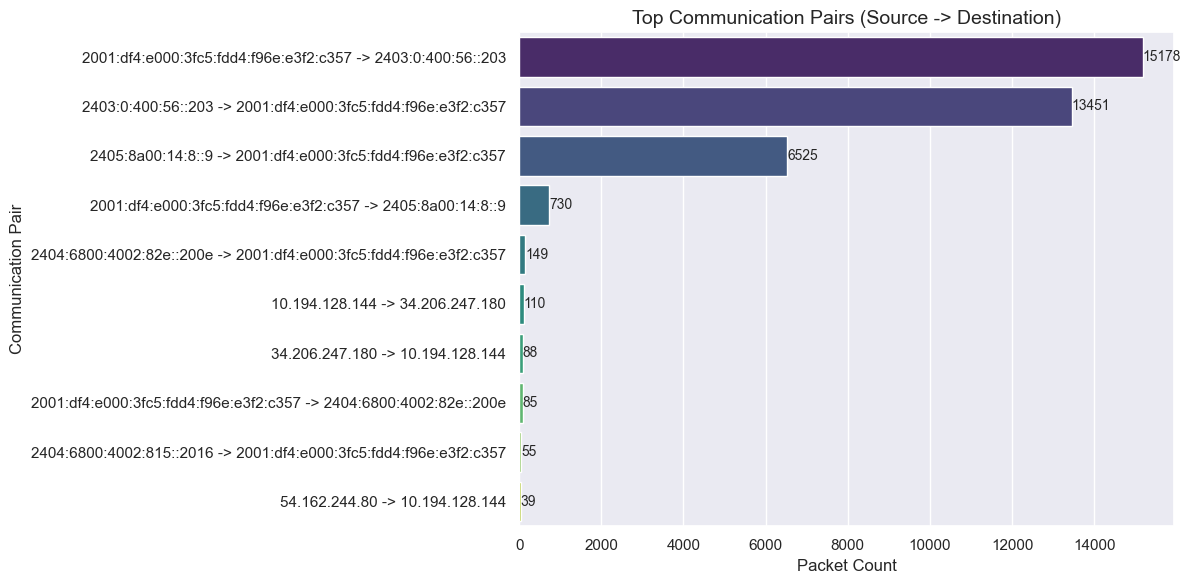

In [37]:
# Create communication pair column
df['pair'] = df['src_ip'] + ' -> ' + df['dst_ip']

# Count occurrences of each pair
pair_counts = df['pair'].value_counts().reset_index()
pair_counts.columns = ['pair', 'packet_count']

# Plotting communication in terms of number of packets
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=pair_counts.head(10),  # top 10 pairs
    x='packet_count',
    y='pair',
    hue='pair',  
    dodge=False,  # Ensure no separation by hue
    palette='viridis',
    legend=False  # Turn off the legend 
)

# Add packet count on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Top Communication Pairs (Source -> Destination)', fontsize=14)
plt.xlabel('Packet Count', fontsize=12)
plt.ylabel('Communication Pair', fontsize=12)
plt.tight_layout()
plt.show()


In [38]:
df = df.fillna(0)
df_srcip_grp = df.groupby(["src_ip", "udp_sport", "tcp_sport", "proto"]).agg({"len": "sum"}).reset_index().rename(columns={"len": "total_bytes"})
df_srcip_grp.sort_values(by="total_bytes")

,src_ip,udp_sport,tcp_sport,proto,total_bytes
1,10.194.128.144,0.0,51742.0,6,40
2,10.194.128.144,0.0,51743.0,6,40
3,10.194.128.144,0.0,51744.0,6,40
4,10.194.128.144,0.0,51745.0,6,40
6,10.194.128.144,0.0,51750.0,6,40
...,...,...,...,...,...
53,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,0.0,53065.0,6,73645
84,2404:6800:4002:82e::200e,443.0,0.0,17,109515
85,2405:8a00:14:8::9,443.0,0.0,17,7968159
75,2403:0:400:56::203,0.0,443.0,6,12058295


In [ ]:
# df_ip1 

## Speedtest data analysis

#### How does a speed test work?

Measure the available bandwidth between the client and server by sending as much traffic as possible (“saturating” the link) and
computing a throughput value according to the number of bytes transferred over some sending
window.

## How to find the speed test server?

In [39]:
df_srcip_grp.sort_values(by="total_bytes", ascending=False).head(10)

,src_ip,udp_sport,tcp_sport,proto,total_bytes
54,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,0.0,53126.0,6,18027429
75,2403:0:400:56::203,0.0,443.0,6,12058295
85,2405:8a00:14:8::9,443.0,0.0,17,7968159
84,2404:6800:4002:82e::200e,443.0,0.0,17,109515
53,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,0.0,53065.0,6,73645
78,2404:6800:4002:815::2016,443.0,0.0,17,54862
61,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,56041.0,0.0,17,47408
59,2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357,52047.0,0.0,17,34055
93,54.162.244.80,0.0,443.0,6,13755
90,34.206.247.180,0.0,443.0,6,9596


The IP addr. **2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357** is the one with the highest traffic volume, i.e., a strong candidate for the speed test **server**.

In [42]:
# Function to determine if traffic is incoming
def is_incoming(x):
    return x["src_ip"] == "	2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357"

# Add 'inbound' column to the DataFrame
df["inbound"] = df.apply(is_incoming, axis=1)

In [33]:
# Selecting server IP and client IP based on #communication patterns observed above (top 2 IPs from src_ip & dst_ip)
# server_ip = "2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357"
# client_ip = "2403:0:400:56::203"

server_ip = "2403:0:400:56::203"
client_ip = "2001:df4:e000:3fc5:fdd4:f96e:e3f2:c357"

In [34]:
# Filter upload packets (client -> server)
upload_packets = df[(df['src_ip'] == client_ip) & (df['dst_ip'] == server_ip)]

In [35]:
# Filter download packets (server -> client)
download_packets = df[(df['src_ip'] == server_ip) & (df['dst_ip'] == client_ip)]

In [36]:
# Compute upload speed
if not upload_packets.empty:
    upload_start_time = upload_packets['ts'].min()
    upload_end_time = upload_packets['ts'].max()
    upload_duration = upload_end_time - upload_start_time
    
    upload_data = upload_packets['len'].sum() * 8  # Convert bytes to bits
    upload_speed = (upload_data / upload_duration) / 1e6  # Mbps
else:
    upload_speed = 0


In [37]:
# Compute download speed
if not download_packets.empty:
    download_start_time = download_packets['ts'].min()
    download_end_time = download_packets['ts'].max()
    download_duration = download_end_time - download_start_time
    
    download_data = download_packets['len'].sum() * 8  # Convert bytes to bits
    download_speed = (download_data / download_duration) / 1e6  # Mbps
else:
    download_speed = 0

In [38]:
# Display results
print(f"Server IP: {server_ip}")
print(f"Upload Speed: {upload_speed:.2f} Mbps")
print(f"Download Speed: {download_speed:.2f} Mbps")

Server IP: 2403:0:400:56::203
Upload Speed: 5.99 Mbps
Download Speed: 3.99 Mbps


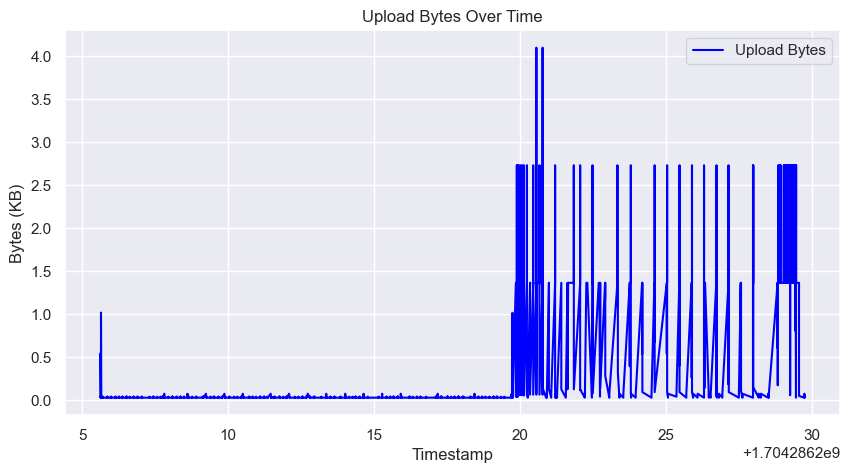

In [39]:
# Prepare upload data for plotting
if not upload_packets.empty:
    upload_plot_data = upload_packets.groupby('ts')['len'].sum().reset_index()
    upload_plot_data['len'] = upload_plot_data['len'] / 1024  # Convert bytes to kilobytes (optional)
else:
    upload_plot_data = pd.DataFrame(columns=['ts', 'len'])

# Plot Upload Bytes Over Time
plt.figure(figsize=(10, 5))
plt.plot(upload_plot_data['ts'], upload_plot_data['len'], label='Upload Bytes', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Bytes (KB)')
plt.title('Upload Bytes Over Time')
plt.legend()
plt.grid(True)
plt.show()

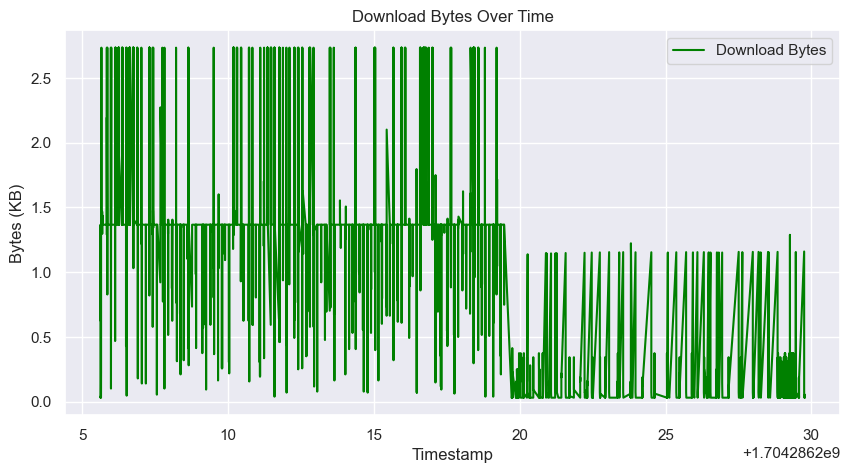

In [40]:
# Prepare download data for plotting
if not download_packets.empty:
    download_plot_data = download_packets.groupby('ts')['len'].sum().reset_index()
    download_plot_data['len'] = download_plot_data['len'] / 1024  # Convert bytes to kilobytes (optional)
else:
    download_plot_data = pd.DataFrame(columns=['ts', 'len'])

# Plot Download Bytes Over Time
plt.figure(figsize=(10, 5))
plt.plot(download_plot_data['ts'], download_plot_data['len'], label='Download Bytes', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Bytes (KB)')
plt.title('Download Bytes Over Time')
plt.legend()
plt.grid(True)
plt.show()